#Predicting Student Marks Using SVM Regression with Hyper-Parameter Tuning
###In this notebook, we delve into a comprehensive step-by-step approach for predicting student marks using Support Vector Machine (SVM) Regression. The dataset used for this analysis, sourced from Kaggle, provides insights into student performance based on various factors, making it ideal for implementing regression techniques.

##Project Objectives
###Our main objectives are:

* Implementing SVM Regression: To model the relationship between student marks and the influencing factors within the dataset.
* Hyper-Parameter Tuning: To optimize the model’s performance by fine-tuning key parameters, including the kernel type, regularization (C), and epsilon (ε) values.
##Key Steps

###The project includes data preprocessing, exploratory data analysis, SVM regression model setup, and hyper-parameter tuning using cross-validation. Each step will provide valuable insights into handling regression tasks in machine learning, from data preparation to model evaluation.

In [1]:
# Data manipulation and visualization
import pandas as pd # It imports the pandas library and assigns it the alias "pd" for easier use.
import numpy as np # It brings in a tool called numpy, nicknamed "np", to help with number crunching in your code.
import matplotlib.pyplot as plt # Import libraries for creating visualizations, aliased as plt.
import seaborn as sns  # Import libraries for creating visualizations, aliased as sns.

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV # It imports functions for splitting data and tuning model hyperparameters for better performance evaluation.
from sklearn.svm import SVR # It imports the Support Vector Regression (SVR) model for performing regression tasks using support vector machines.
from sklearn.preprocessing import StandardScaler # It imports the StandardScaler to standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import mean_squared_error, r2_score # It imports functions to calculate Mean Squared Error (MSE) and R-squared (R2) for regression model evaluation.

In [2]:
df = pd.read_csv('Student_Marks (1).csv')  #Loads the data from the CSV file into a pandas DataFrame named df.

In [3]:
df.head() #Displays the first 5 rows of the DataFrame df.

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
df.info() # It prints a concise summary of the DataFrame, including data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.isnull().sum()

,0
number_courses,0
time_study,0
Marks,0


##We can see there is no null values in the dataframe.

In [6]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


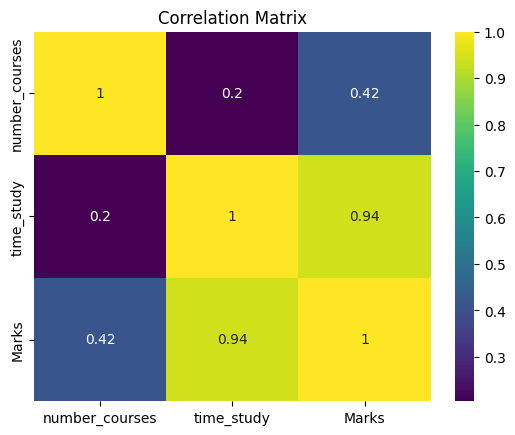

In [7]:
# Visualize correlations (if applicable)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Separate features and target variable
X = df.drop('Marks', axis=1)
y = df['Marks']
# It separates the dataset into features (X) by excluding the 'price' column and assigns 'price' as the target variable (y).

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# It splits the data into training and testing sets (80% train, 20% test) with a fixed random seed for reproducibility.

In [10]:
svr = SVR()
svr = svr.fit(X_train, y_train)

In [11]:
# Predictions and evaluation
y_pred = svr.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.6915230838373385
Mean Squared Error: 81.1125537295644


In [12]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1]
}


In [13]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

In [14]:
# Best parameters and model evaluation
best_svr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_tuned = best_svr.predict(X_test)
print("Tuned R2 Score:", r2_score(y_test, y_pred_tuned))
print("Tuned Mean Squared Error:", mean_squared_error(y_test, y_pred_tuned))

Best Parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
Tuned R2 Score: 0.9992788475003664
Tuned Mean Squared Error: 0.1896236567759516


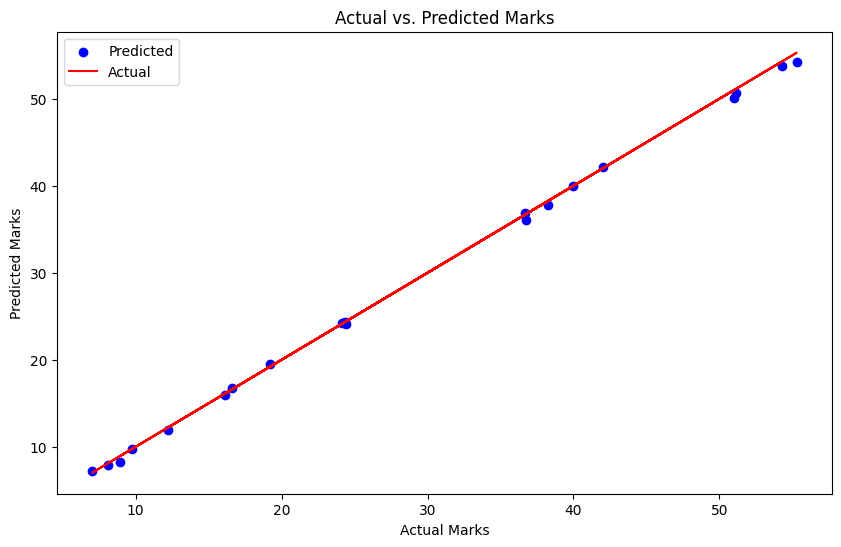

In [15]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.legend()
plt.title('Actual vs. Predicted Marks')
plt.show()
